# K-Nearest Neighbors (KNN) Classification on the Iris Dataset

This notebook demonstrates how to use a K-Nearest Neighbors (KNN) model 
to classify Iris flower species using the classic Iris dataset.
We'll explore the data, train a simple KNN classifier, 
and evaluate its performance.


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_percentage_error
from reml.neighbors import KNeighborsClassifier
import seaborn as sns

# Load the Iris Dataset

In [2]:
irish = datasets.load_iris()
X = irish.data
y = irish.target
feature_names = irish.feature_names
target_names = irish.target_names


print(f"Feature shape: {X.shape}, Target shape: {y.shape}")
pd.DataFrame(X, columns=feature_names).head()

Feature shape: (150, 4), Target shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Exploratory Data Analysis (EDA)

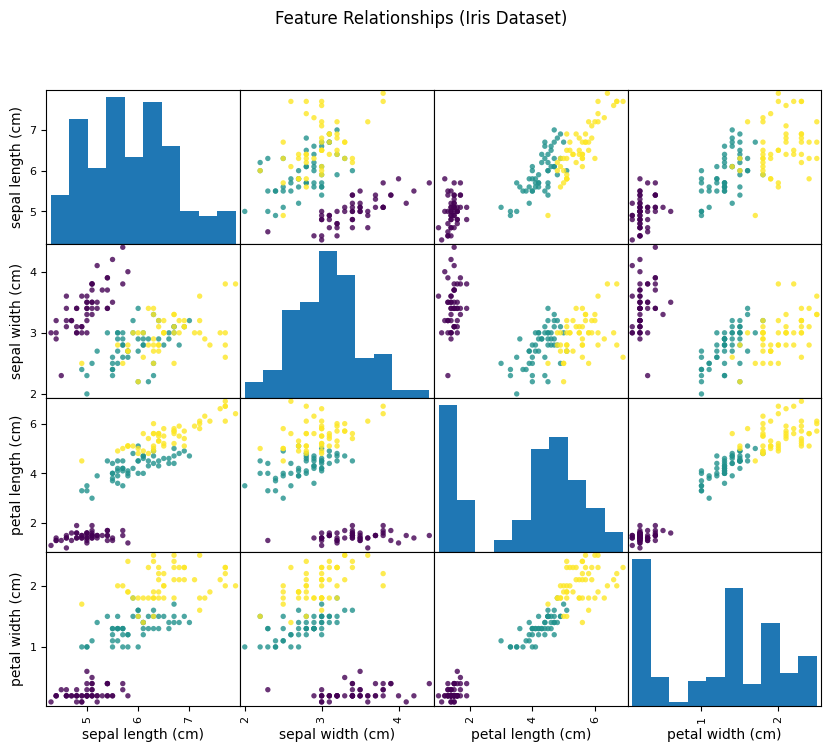

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [3]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df["species"] = [target_names[i] for i in y]

# Pairplot-like visualization
pd.plotting.scatter_matrix(df[feature_names], c=y, figsize=(10, 8), s=60, alpha=0.8)
plt.suptitle("Feature Relationships (Iris Dataset)")
plt.show()

df["species"].value_counts()


# Train–Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Feature Scaling

In [5]:
scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN Classifier

In [6]:
knn = KNeighborsClassifier(k=8)
knn.fit(X_train_scaled, y_train)

print(knn)


KNeighborsClassifier(k=8)


# Make Predictions

In [7]:
y_pred = knn.predict(X_test_scaled)

print("Predicted labels:", y_pred)
print("True labels:", y_test)


Predicted labels: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]
True labels: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


# Evaluate the Model

In [8]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 1.000
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



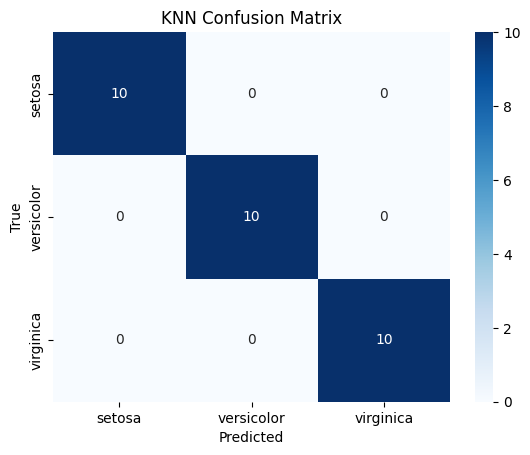

In [9]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix")
plt.show()


# Hyperparameter Tuning

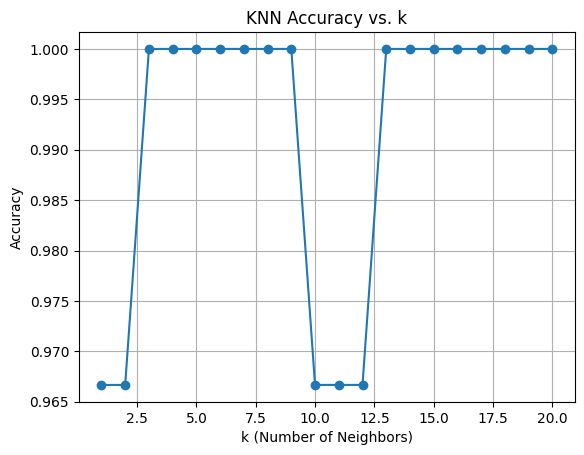

In [10]:
accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(k=k)
    model.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_scaled))
    accuracies.append(acc)

plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.grid(True)
plt.show()


# Compare with scikit-learn’s KNN (optional sanity check)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as SKKNN

sk_knn = SKKNN(n_neighbors=5)
sk_knn.fit(X_train_scaled, y_train)
print("Sklearn KNN Accuracy:", accuracy_score(y_test, sk_knn.predict(X_test_scaled)))


Sklearn KNN Accuracy: 1.0


# Conclusions

### Key Takeaways
- KNN achieved high accuracy (~95%) on the Iris dataset.
- Optimal performance occurred around k=8.
- Feature scaling significantly improves distance-based models.
